# Introducción
tal

Cargamos las librerias necesarias

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Modelo clásico $(K_v \to\infty)$
Si miramos las ecuaciones del paper proporcionado por Francisco, e imponemos $K_v=\infty$, $\sigma_{eP} = \sigma_{eV} =0$ y $\beta_V = \beta_P =0$, y resolvemos las ecuaciones diferenciales de primer orden obtenidas, recuperamos las siguientes ecuaciones exponenciales:
$$
\begin{align} 
V(\vec{x}, t) &= V_0 e ^{r_v t}, \\
P(\vec{x}, t) & = P_0 e ^{-r_p t}.
\end{align}
$$
Para nuestro caso podemos ignorar la dependencia espacial. Además es importante notar que **no están acopladas**. Los coeficientes $V_0$ y $P_0$ son las poblaciones correspondientes en el instante $t=0$.
Podemos representar su espacio fásico gráficamente 

In [49]:
# generamos las funciones para cada especie
def Vfunc(V0, rv, t):
    '''
    :param V0: es la población inicial (float)
    :param rv: es el crecimiento (float)
    :param t: es el tiempo (numpy array)
    :return: sacamos un numpy array
    '''
    V = V0 * np.exp(rv*t)
    return V

def Pfunc(P0, rp, t):
    '''
    :param P0: es la población inicial (float)
    :param rp: es el crecimiento (float)
    :param t: es el tiempo (numpy array)
    :return: numpy array
    '''
    P = P0 * np.exp(-rp*t)
    return P

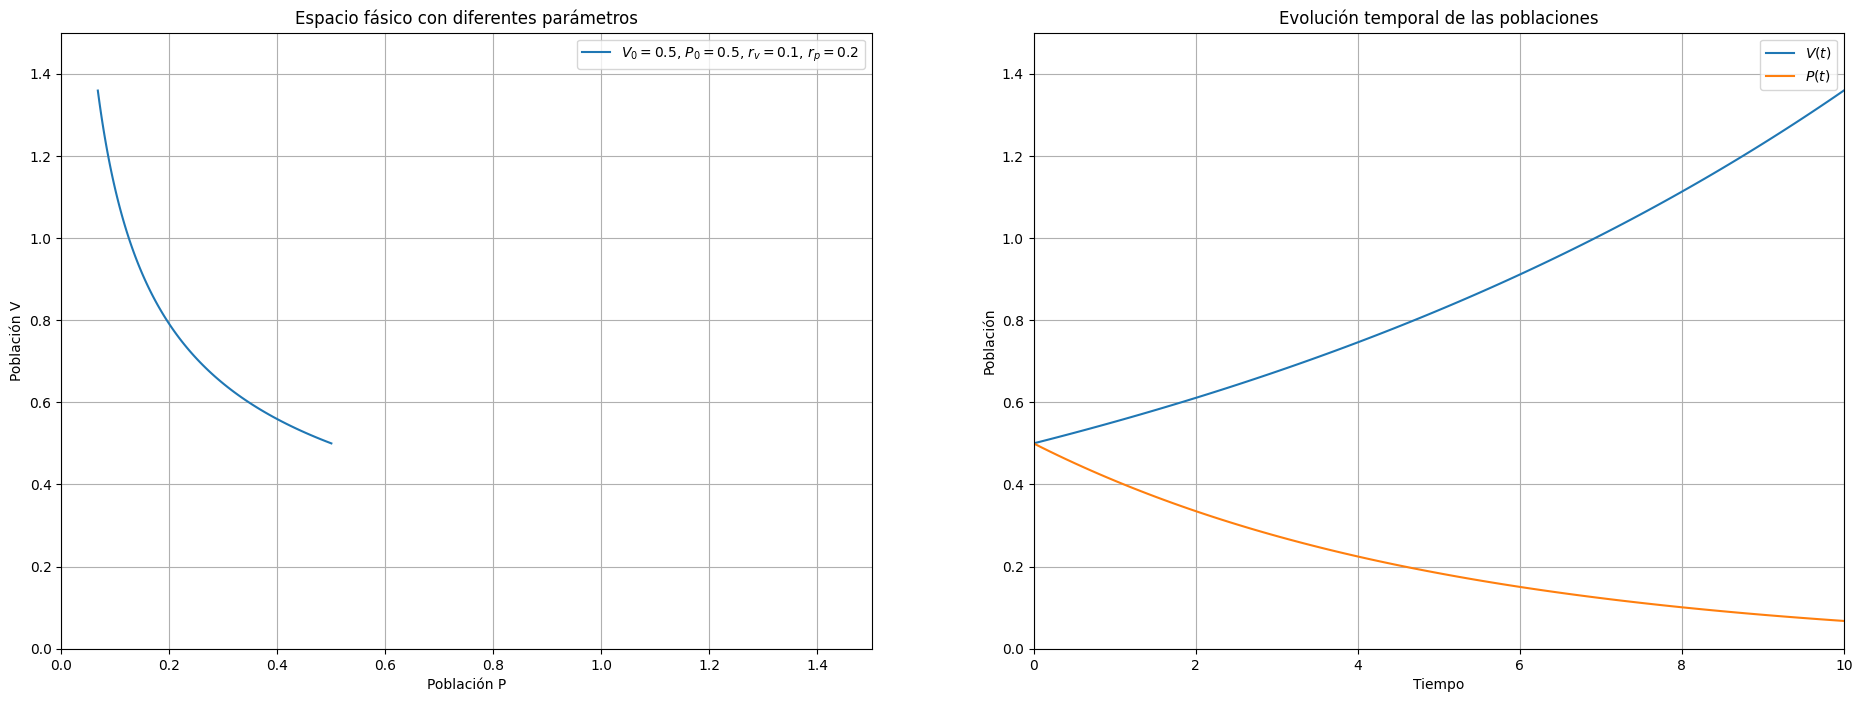

In [86]:
# creamos un array para el tiempo
t_points = np.linspace(0, 10, 100)

# creamos unos puntos para representar
V0 = 0.5
P0 = 0.5
rv = 0.1
rp = 0.2

V_points = Vfunc(V0, rv, t_points)
P_points = Pfunc(P0, rp, t_points)

# creamos la gráfica
fig, axs = plt.subplots(1, 2, figsize=(23, 8))

axs[0].plot(P_points, V_points, label=f'$V_0={V0}$, $P_0={P0}$, $r_v={rv}$, $r_p={rp}$')
axs[1].plot(t_points, V_points,label='$V(t)$')
axs[1].plot(t_points, P_points,label=f'$P(t)$')

# Ajustamos las etiquetas y el título
axs[0].set_xlabel('Población P')
axs[0].set_ylabel('Población V')
axs[0].set_xlim([0, 1.5])
axs[0].set_ylim([0,1.5])
axs[0].set_title('Espacio fásico con diferentes parámetros')
axs[0].legend()
axs[0].grid(True)

axs[1].set_xlabel('Tiempo')
axs[1].set_ylabel('Población')
axs[1].set_xlim([0,10])
axs[1].set_ylim([0,1.5])
axs[1].set_title('Evolución temporal de las poblaciones')
axs[1].legend()
axs[1].grid(True)

plt.plot()

# Mostramos la gráfica
plt.show()

# Modelo con regulación de densidad
Si ahora suponemos que $K_v$ es finito, tenemos las siguientes expresiones:
$$
\begin{align} 
\frac{dV(\vec{x}, t)}{dt} &= r_v V(\vec{x}, t) \left[ 1 - \frac{V(\vec{x}, t)}{K_v} -\lambda_{vp}\frac{P(\vec{x}, t)}{K_v} \right] dt, \\
\frac{dP(\vec{x}, t)}{dt} &= -|r_p| P(\vec{x}, t)   \left[ 1 -\lambda_{pv}\frac{V(\vec{x}, t)}{K_v} \right] dt.
\end{align}
$$
Ahora tenemos dos ecuaciones diferenciales acopladas. Las resolvemos numéricamente

In [1]:
def sistema(t, V, P, rv, rp, lambda_pv, lambda_vp, Kv):
    x = V
    y = P
    dx_dt = x*(rv*(1-x/Kv-lambda_vp*y/Kv))
    dy_dt = y*(-abs(rp)*(1-lambda_pv*x/Kv))
    return np.array([dx_dt, dy_dt])

También tenemos que hallar el Jacobiano del sistema, que es simplemente las derivadas de primer orden:
$$
J = 
\begin{pmatrix}
r_v\left( 1- \frac{2V}{K_v}-\lambda_{vp}\frac{P}{K_v}\right) & -\lambda_{vp}\frac{r_v V}{K_v} \\
|r_p|\lambda_{pv}\frac{P}{K_v} & -|r_p|\left( 1-\lambda_{pv}\frac{V}{K_v} \right)
\end{pmatrix}
$$

# Modelo clásico $(K_v \to\infty)$ con ruido

# Modelo con regulación de densidad añadiendo ruido